In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,value='value',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                time_budget= 60,  metric= 'r2');

In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: extra_tree
Best model parameters: {'n_estimators': 51, 'max_features': 0.5343689774736776, 'max_leaves': 1549}


In [11]:
automl.best_result

{'pred_time': 1.5844361053849862e-05,
 'wall_clock_time': 54.45808005332947,
 'metric_for_logging': {'pred_time': 1.5844361053849862e-05},
 'val_loss': 0.13101876463665327,
 'training_iteration': 1,
 'config': {'n_estimators': 51,
  'max_features': 0.5343689774736776,
  'max_leaves': 1549},
 'config/n_estimators': 51,
 'config/max_features': 0.5343689774736776,
 'config/max_leaves': 1549,
 'experiment_tag': 'exp',
 'time_total_s': 0.3781297206878662}

In [12]:
automl.feature_importances_

array([0.06927454, 0.12584726, 0.06087214, 0.08196924, 0.06105521,
       0.167359  , 0.07779899, 0.02632392, 0.0410886 , 0.01560599,
       0.03433963, 0.09769568, 0.10280362, 0.03796617])

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype=object)

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.910860,1.120968e-01,1.990209,1.218452e-02,0.216329,2.831611,0.937423,***,0.637522,0.818761,0.878762,testing
0,4780,0.970084,3.753390e-17,0.582210,4.119017e-18,0.063893,0.733581,0.996082,***,0.893654,0.946827,0.992180,training
0,6373,0.955280,2.801981e-02,0.934155,3.067559e-03,0.102270,1.551715,0.982026,***,0.829512,0.914756,0.964376,all


In [16]:
df1a

,rowid,date,t2m,ssrd,tcc,tp,rh2m,u10,blh,v10,sp,d2m,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,278.394725,-1.164153e-10,0.650958,0.000008,91.884130,-2.720528,384.209053,1.545010,102252.303312,277.183465,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,277.772899,-1.164153e-10,0.603699,0.000002,92.715877,-2.308789,353.220263,1.282742,102211.168636,276.695430,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,277.463419,-1.164153e-10,0.710378,0.000005,93.485560,-2.216471,255.911846,0.758730,102174.855967,276.505662,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,277.305813,-1.164153e-10,0.837765,0.000005,93.906363,-1.928623,191.375560,0.509013,102166.786485,276.412816,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,277.478941,-1.164153e-10,0.819103,0.000003,93.696878,-1.700043,151.780210,0.607069,102142.578039,276.553051,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,273.557442,-5.820766e-11,0.918149,0.000000,90.582979,1.380939,476.945688,-1.945195,99902.506413,272.197565,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,273.629146,-5.820766e-11,0.839639,0.000000,89.939908,0.987925,486.665851,-2.102732,99947.625909,272.171041,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,273.470592,-5.820766e-11,0.739354,0.000000,90.422188,0.681543,489.355002,-1.933668,100000.215520,272.087408,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,272.926062,-5.820766e-11,0.643753,0.000000,95.088677,1.020793,40.714872,-0.583816,100042.844978,272.235319,17.1,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=ad.normalise(automl, df1a,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-20 22:50:45 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
Execution time: 12.47 seconds


In [18]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,15.820638
2020-01-01 01:00:00,43.2,15.474351
2020-01-01 02:00:00,43.0,14.332521
2020-01-01 03:00:00,42.8,14.216438
2020-01-01 04:00:00,36.8,13.933206
...,...,...
2020-12-31 19:00:00,11.7,9.441426
2020-12-31 20:00:00,11.0,9.031804
2020-12-31 21:00:00,15.3,9.105334


In [19]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300)

2024-06-20 22:51:59 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...


In [20]:
df_dew

,Observed,Normalised
date,,
2020-01-01 00:00:00,58.1,23.656015
2020-01-01 01:00:00,43.2,24.041840
2020-01-01 02:00:00,43.0,22.934675
2020-01-01 03:00:00,42.8,22.623621
2020-01-01 04:00:00,36.8,22.385853
...,...,...
2020-12-31 19:00:00,11.7,11.190061
2020-12-31 20:00:00,11.0,11.553219
2020-12-31 21:00:00,15.3,11.211702


In [21]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [22]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=300,n_models=10)

2024-06-20 22:53:03 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-20 22:54:09 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-20 22:55:24 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-20 22:56:29 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-20 22:57:36 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-20 22:58:47 : Resampli

In [23]:
df_dew

,Observed,Normalised_979812,Normalised_378829,Normalised_120727,Normalised_541475,Normalised_488292,Normalised_813334,Normalised_90992,Normalised_206312,Normalised_81536,Normalised_774600,mean,std,median,lower_bound,upper_bound,weighted
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,25.189632,30.458170,17.738708,12.403318,18.103666,14.625942,13.974942,23.631580,21.747360,13.402923,19.127624,5.963399,17.921187,12.628229,29.272749,18.599081
2020-01-01 01:00:00,43.2,24.857805,25.941523,18.275362,11.821238,18.546307,13.103605,13.291233,19.904009,21.480738,13.485687,18.070751,5.064754,18.410834,12.109771,25.697686,17.792654
2020-01-01 02:00:00,43.0,24.518227,26.792866,18.299864,11.916231,17.887413,12.625865,13.255446,21.469257,20.857962,13.173861,18.079699,5.288778,18.093638,12.075899,26.281072,17.758050
2020-01-01 03:00:00,42.8,23.786007,27.780739,18.179382,12.223056,17.335865,13.628104,12.758092,20.045937,20.828183,13.489414,18.005478,5.186603,17.757624,12.343439,26.881924,17.689531
2020-01-01 04:00:00,36.8,24.300438,26.903036,16.906803,13.143002,17.881418,13.496162,13.474745,21.055161,21.287563,13.161558,18.160989,5.031181,17.394111,13.147177,26.317452,17.835043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.918848,12.807426,14.038887,9.876667,10.633903,10.515366,10.071639,13.368443,10.369315,10.294822,11.389532,1.521175,10.574634,9.920536,13.888037,11.205189
2020-12-31 20:00:00,11.0,11.464137,12.763096,13.587616,10.558971,10.849424,10.179301,10.032627,12.987794,10.307013,10.174638,11.290462,1.338130,10.704198,10.064579,13.452656,11.184825
2020-12-31 21:00:00,15.3,11.921185,12.505454,13.269509,10.402478,10.519296,10.051037,9.647070,12.778439,9.928736,9.916316,11.093952,1.373611,10.460887,9.707650,13.159018,10.952807


# Time series decomposition

In [24]:
df_dewca, mod_stats=ad.emi_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random',time_budget=60,
                  n_samples=300,fraction=0.75)

2024-06-20 23:06:18 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['hour', 't2m', 'ssrd', 'tcc', 'date_unix', 'day_julian', 'tp', 'rh2m', 'weekday', 'blh', 'v10', 'sp', 'u10', 'd2m'] and predicting 300 times...
2024-06-20 23:06:21 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['hour', 't2m', 'tcc', 'ssrd', 'day_julian', 'tp', 'rh2m', 'weekday', 'blh', 'u10', 'v10', 'sp', 'd2m'] and predicting 300 times...
2024-06-20 23:06:24 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['hour', 't2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'weekday', 'blh', 'v10', 'sp', 'u10', 'd2m'] and predicting 300 times...
2024-06-20 23:06:27 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['hour', 't2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'blh', 'u10', 'v10', 'sp', 'd2m'] and predicting 300 times...
2024-06-20 23:06:30 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 

In [25]:
df_dewca

,Observed,base,date_unix,day_julian,weekday,hour,emi_noise,Deweathered
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.551792,21.300529,1.956665,0.548534,-0.553169,0.403455,23.656015
2020-01-01 01:00:00,43.2,9.389310,21.584976,2.150963,0.651312,-0.586384,0.240973,24.041840
2020-01-01 02:00:00,43.0,9.132077,20.942314,1.911732,0.551929,-0.455040,-0.016260,22.934675
2020-01-01 03:00:00,42.8,9.278408,21.108650,1.621986,0.559805,-0.796890,0.130071,22.623621
2020-01-01 04:00:00,36.8,8.912662,21.007887,1.777134,0.542274,-0.705767,-0.235676,22.385853
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.806517,10.525983,0.877567,0.090751,0.037580,-0.341821,11.190061
2020-12-31 20:00:00,11.0,8.629436,10.923817,1.042783,0.084645,0.020875,-0.518901,11.553219
2020-12-31 21:00:00,15.3,8.297555,10.931462,1.128102,0.084486,-0.081566,-0.850782,11.211702


In [26]:
df_dewcb, mod_stats=ad.met_decom(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-20 23:07:33 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'u10', 'blh', 'v10', 'sp', 'd2m'] and predicting 100 times...
2024-06-20 23:07:34 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'v10', 'sp', 'u10', 'd2m'] and predicting 100 times...
2024-06-20 23:07:36 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'v10', 'sp', 'd2m'] and predicting 100 times...
2024-06-20 23:07:37 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'v10', 'sp'] and predicting 100 times...
2024-06-20 23:07:38 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2m', 'ssrd', 'tcc', 'tp', 'rh2m', 'v10'] and predicting 100 times...
2024-06-20 23:07:39 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['t2

In [27]:
df_dewcb

,Observed,Deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,23.289709,2.964432,14.897219,12.616907,2.927109,6.132069,5.267643,2.838661,1.866161,0.482162,0.451550,9.400610
2020-01-01 01:00:00,43.2,23.582930,0.520636,10.443087,10.766861,3.038982,5.933002,5.273609,2.183613,1.812893,1.330917,-0.310791,-0.640710
2020-01-01 02:00:00,43.0,22.667221,0.348621,6.537346,7.772820,3.233620,4.402218,5.108868,3.506721,2.805485,2.753994,1.282928,1.364532
2020-01-01 03:00:00,42.8,23.204002,-0.872589,5.464396,9.155502,3.609728,2.635044,4.393593,3.139999,2.422325,3.231228,1.712376,1.993581
2020-01-01 04:00:00,36.8,22.390478,-0.489992,1.683825,4.882938,3.882023,2.407362,3.672527,3.049540,2.118465,2.943619,1.869846,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.537573,-0.807942,-0.609234,0.274380,0.280975,0.325347,0.878274,0.786845,0.128425,0.102864,-0.243179,-0.272834
2020-12-31 20:00:00,11.0,11.509198,-0.227622,-0.323502,-0.117915,0.239534,0.398879,0.890781,0.800226,-0.538642,-0.580739,-0.205429,-0.571941
2020-12-31 21:00:00,15.3,11.062766,0.005542,0.032619,0.106030,0.330998,0.341270,0.795583,0.767356,-0.510854,-0.481171,-0.063914,3.652802


# Rolling weather normalisation

In [28]:
df_dewc1, mod_stats=ad.rolling_dew(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-06-20 23:08:46 : Resampling data range from 2020-01-01 to 2020-01-15
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:08:47 : Resampling data range from 2020-01-09 to 2020-01-23
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:08:47 : Resampling data range from 2020-01-16 to 2020-01-30
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:08:48 : Resampling data range from 2020-01-23 to 2020-02-06
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:08:48 : Resampling data range from 2020-01-31 to 2020-02-14
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:08:49 : Resampli

In [29]:
df_dewc1.head()

,Observed,Rolling_0,Rolling_1,Rolling_2,Rolling_3,Rolling_4,Rolling_5,Rolling_6,Rolling_7,Rolling_8,...,Rolling_29,Rolling_30,Rolling_31,Rolling_32,Rolling_33,Rolling_34,Rolling_35,Rolling_36,Rolling_37,Rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,17.029417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,18.292791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,17.315693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.808010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.257004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

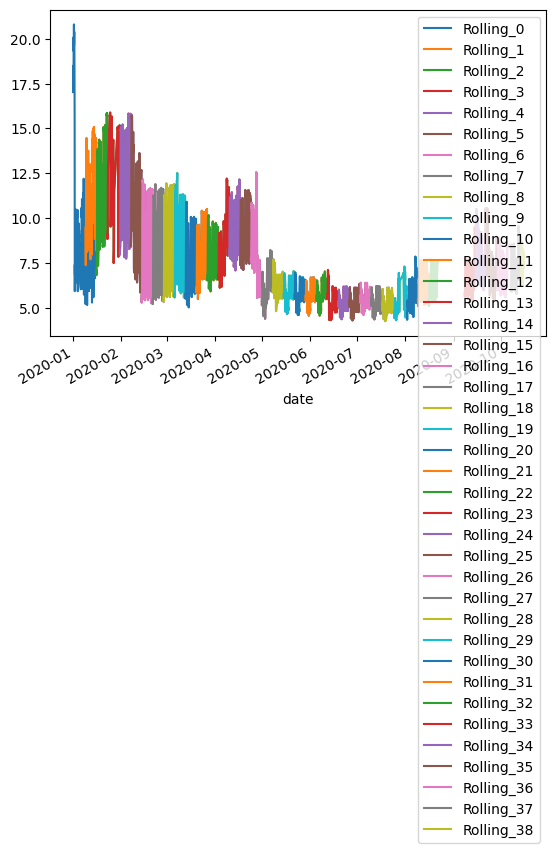

In [30]:
df_dewc1.iloc[:,1:].plot()

In [31]:
df_dewc2, mod_stats=ad.met_rolling(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-20 23:10:07 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:10:08 : Resampling data range from 2020-01-01 to 2020-01-15
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:10:08 : Resampling data range from 2020-01-09 to 2020-01-23
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:10:09 : Resampling data range from 2020-01-16 to 2020-01-30
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:10:09 : Resampling data range from 2020-01-23 to 2020-02-06
Resampling variales: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-20 23:10:10 : Resampli

In [32]:
df_dewc2.head()

,Observed,Normalised,EMI_mean_14,EMI_std_14,MET_short,MET_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.289709,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.582930,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,22.667221,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,23.204002,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.390478,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

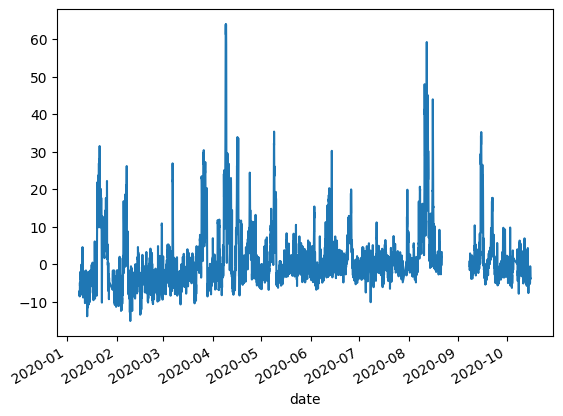

In [33]:
df_dewc2['MET_short'].plot()

<Axes: xlabel='date'>

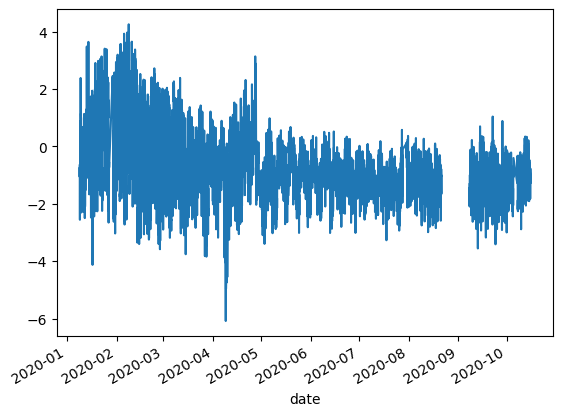

In [34]:
df_dewc2['MET_season'].plot()

# Partial Dependence Plots

In [35]:
import normet.pdp as pdp

In [36]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [37]:
df1a

,rowid,date,t2m,ssrd,tcc,tp,rh2m,u10,blh,v10,sp,d2m,value,date_unix,day_julian,weekday,hour,set
0,0,2020-01-01 00:00:00,278.394725,-1.164153e-10,0.650958,0.000008,91.884130,-2.720528,384.209053,1.545010,102252.303312,277.183465,58.1,1.577837e+09,1,3,0,training
1,1,2020-01-01 01:00:00,277.772899,-1.164153e-10,0.603699,0.000002,92.715877,-2.308789,353.220263,1.282742,102211.168636,276.695430,43.2,1.577840e+09,1,3,1,training
2,2,2020-01-01 02:00:00,277.463419,-1.164153e-10,0.710378,0.000005,93.485560,-2.216471,255.911846,0.758730,102174.855967,276.505662,43.0,1.577844e+09,1,3,2,testing
3,3,2020-01-01 03:00:00,277.305813,-1.164153e-10,0.837765,0.000005,93.906363,-1.928623,191.375560,0.509013,102166.786485,276.412816,42.8,1.577848e+09,1,3,3,training
4,4,2020-01-01 04:00:00,277.478941,-1.164153e-10,0.819103,0.000003,93.696878,-1.700043,151.780210,0.607069,102142.578039,276.553051,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2020-12-31 19:00:00,273.557442,-5.820766e-11,0.918149,0.000000,90.582979,1.380939,476.945688,-1.945195,99902.506413,272.197565,11.7,1.609441e+09,366,4,19,training
6369,6369,2020-12-31 20:00:00,273.629146,-5.820766e-11,0.839639,0.000000,89.939908,0.987925,486.665851,-2.102732,99947.625909,272.171041,11.0,1.609445e+09,366,4,20,training
6370,6370,2020-12-31 21:00:00,273.470592,-5.820766e-11,0.739354,0.000000,90.422188,0.681543,489.355002,-1.933668,100000.215520,272.087408,15.3,1.609448e+09,366,4,21,testing
6371,6371,2020-12-31 22:00:00,272.926062,-5.820766e-11,0.643753,0.000000,95.088677,1.020793,40.714872,-0.583816,100042.844978,272.235319,17.1,1.609452e+09,366,4,22,training


In [38]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=pdp.pdp_all(automl,df1a,feature_names=all_features)

In [39]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,11.374119,7.019472
1,u10,-4.242993,11.404237,7.026604
2,u10,-4.131954,11.379812,7.044130
3,u10,-4.020915,11.367407,7.076672
4,u10,-3.909875,11.383136,7.076927
...,...,...,...,...
1226,hour,19.000000,9.453330,7.230855
1227,hour,20.000000,9.404597,7.216637
1228,hour,21.000000,9.362933,7.217675
1229,hour,22.000000,9.304104,7.257317


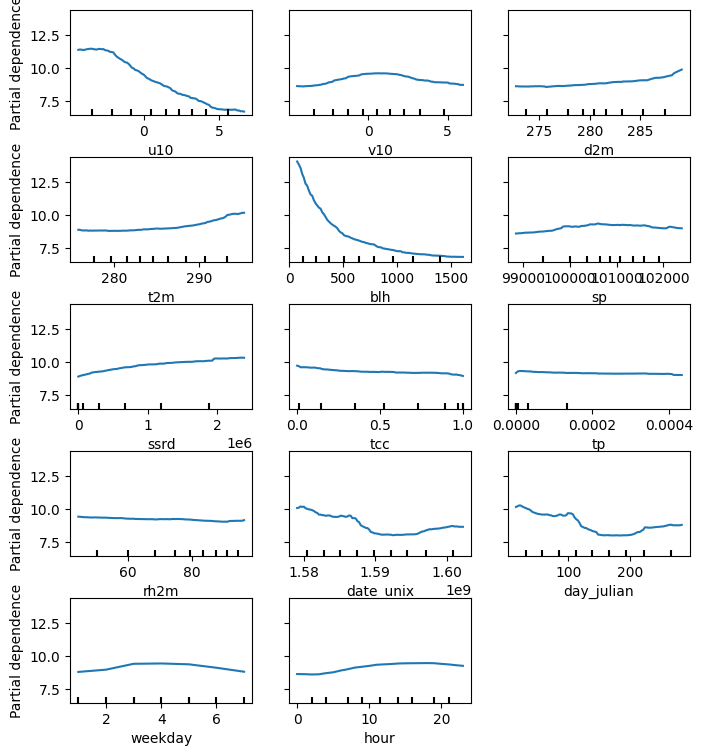

In [40]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,figsize=(8,9),hspace=0.4)

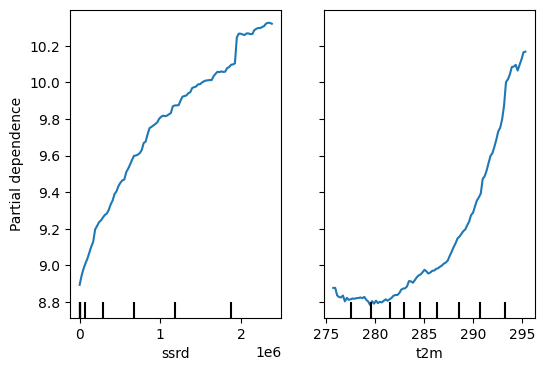

In [41]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='average',figsize=(6,4))

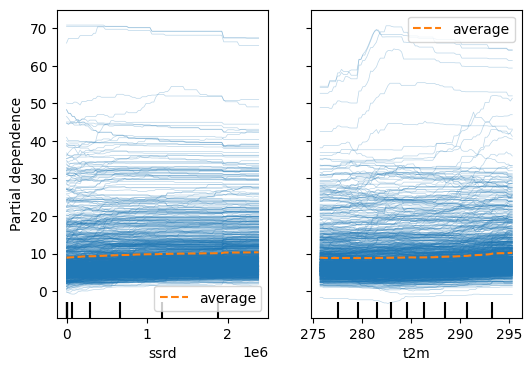

In [42]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='both',figsize=(6,4))

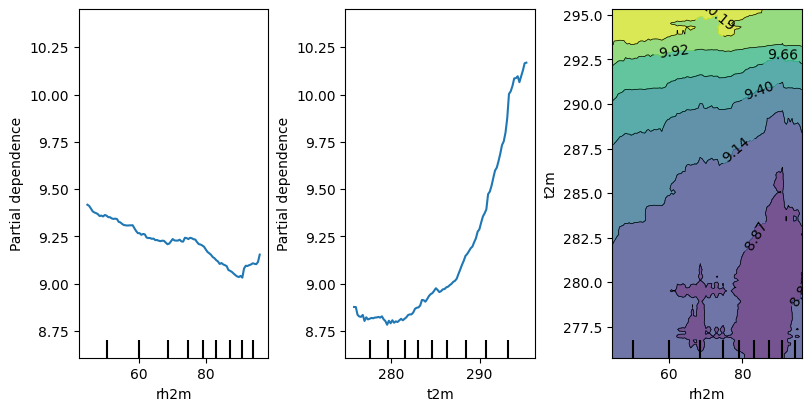

In [43]:
pdp.pdp_interaction(automl,df1a,variables=['rh2m','t2m',('rh2m','t2m')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

# Change Points Detection

In [44]:
df_dewca.head()

,Observed,base,date_unix,day_julian,weekday,hour,emi_noise,Deweathered
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.551792,21.300529,1.956665,0.548534,-0.553169,0.403455,23.656015
2020-01-01 01:00:00,43.2,9.389310,21.584976,2.150963,0.651312,-0.586384,0.240973,24.041840
2020-01-01 02:00:00,43.0,9.132077,20.942314,1.911732,0.551929,-0.455040,-0.016260,22.934675
2020-01-01 03:00:00,42.8,9.278408,21.108650,1.621986,0.559805,-0.796890,0.130071,22.623621
2020-01-01 04:00:00,36.8,8.912662,21.007887,1.777134,0.542274,-0.705767,-0.235676,22.385853


In [45]:
import normet.cpd as cpd
import matplotlib.pyplot as plt

In [46]:
pt=cpd.cpd_rupture(df_dewca.resample('1D').mean(),'date_unix',window=14, n=5)

In [47]:
pt

DatetimeIndex(['2020-02-09', '2020-04-04', '2020-04-14', '2020-04-24',
               '2020-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

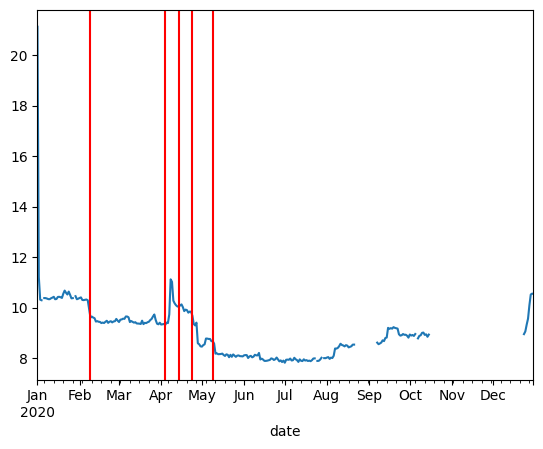

In [48]:
fig,ax=plt.subplots()
df_dewca['date_unix'].resample('1D').mean().plot()
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')